In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# load images

from tensorflow.keras.preprocessing.image import load_img 

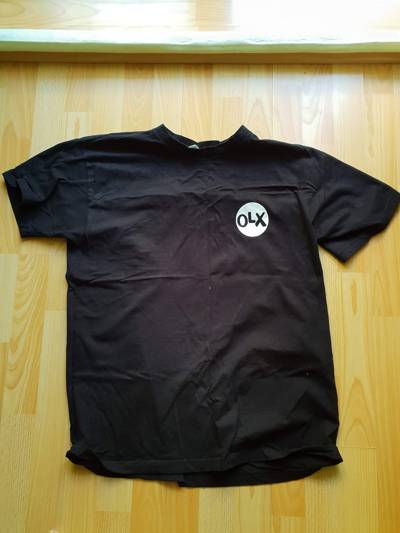

In [4]:
import os

path = r'C:\Users\Lenovo\Desktop\mlbooc\clothing-dataset-small\train\t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = os.path.join(path, name)  # Automatically handles slashes
load_img(fullname)

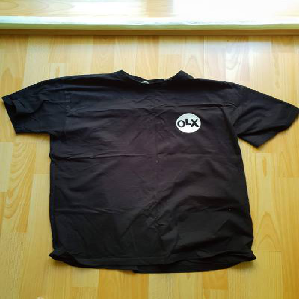

In [5]:
load_img(fullname, target_size=(299, 299))

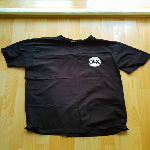

In [6]:
load_img(fullname, target_size=(150, 150))

# Pretrained model

In [7]:
# # Let's apply a pre-trained neural network with imagenet classes.
# # We'll use Xception, but any other architecture will work as well.

# We'll need to import 3 things:

# the model itself (Xception)
# the preprocess_input function that takes an image and prepares it
# the decode_predictions that converts the predictions of the model into human-readable classes

In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
model = Xception(
    weights='imagenet',
    input_shape=(299, 299, 3)
)

In [10]:
img = load_img(fullname, target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

In [11]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [12]:
X = preprocess_input(X)

In [13]:
pred = model.predict(X)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(1, 1000)

In [14]:
pred[0, :10]

array([0.0003238 , 0.00015736, 0.00021406, 0.00015296, 0.00024657,
       0.00030446, 0.00032349, 0.00014726, 0.00020487, 0.00014866],
      dtype=float32)

In [15]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6792447),
  ('n02916936', 'bulletproof_vest', 0.03960031),
  ('n04370456', 'sweatshirt', 0.03529961),
  ('n03710637', 'maillot', 0.010884152),
  ('n04525038', 'velvet', 0.0018057629)]]

# Transfer learning

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
image_size = (150, 150)
batch_size = 32

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    r"C:\Users\Lenovo\Desktop\mlbooc\clothing-dataset-small\train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.


In [19]:
# valida
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    r"C:\Users\Lenovo\Desktop\mlbooc\clothing-dataset-small\validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 341 images belonging to 10 classes.


# Creating the model

In [20]:
base_model = Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False #exclude dense lay
)

base_model.trainable = False

In [21]:
# build cloth class model

In [22]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)
vector = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vector)

model = keras.Model(inputs, outputs)

# Training the model

In [23]:
learning_rate = 0.01

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [25]:
history = model.fit(train_ds, epochs=3, validation_data=val_ds)

Epoch 1/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.8436 - loss: 0.4854 - val_accuracy: 0.7771 - val_loss: 0.8375
Epoch 2/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.8777 - loss: 0.3681 - val_accuracy: 0.7859 - val_loss: 0.8501
Epoch 3/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.9213 - loss: 0.2282 - val_accuracy: 0.7918 - val_loss: 0.8943


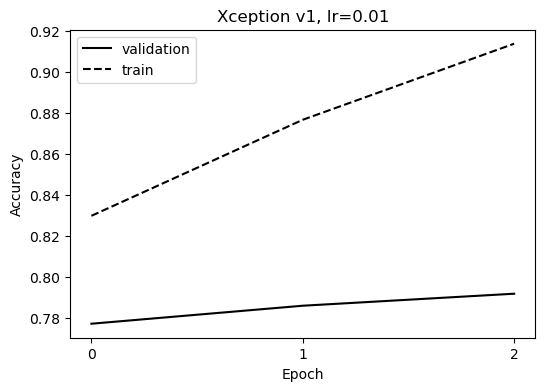

In [26]:
plt.figure(figsize=(6, 4))

epochs = history.epoch
val = history.history['val_accuracy']
train = history.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('Xception v1, lr=0.01')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(np.arange(3))

plt.legend()


plt.savefig('xception_v1_0_01.svg')

plt.show()

In [27]:
def make_model(learning_rate):
    base_model = Xception(
        weights='imagenet',
        input_shape=(150, 150, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vector)

    model = keras.Model(inputs, outputs)
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    
    return model

In [28]:
model = make_model(learning_rate=0.001)
history_0_001 = model.fit(train_ds, epochs=3, validation_data=val_ds)

Epoch 1/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.5151 - loss: 1.4961 - val_accuracy: 0.7771 - val_loss: 0.7151
Epoch 2/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.7968 - loss: 0.6289 - val_accuracy: 0.7918 - val_loss: 0.6386
Epoch 3/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.8260 - loss: 0.5138 - val_accuracy: 0.7918 - val_loss: 0.6075


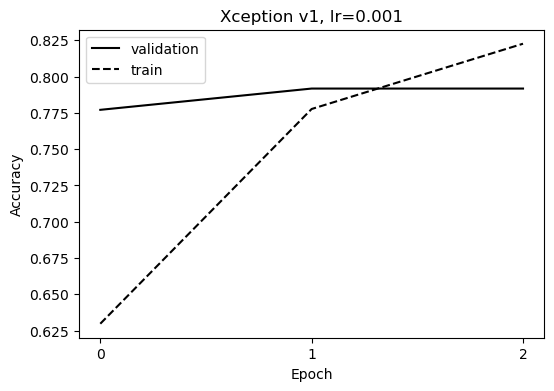

In [29]:
plt.figure(figsize=(6, 4))

epochs = history_0_001.epoch
val = history_0_001.history['val_accuracy']
train = history_0_001.history['accuracy']

plt.plot(epochs, val, color='black', linestyle='solid', label='validation')
plt.plot(epochs, train, color='black', linestyle='dashed', label='train')

plt.title('Xception v1, lr=0.001')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()


plt.savefig('xception_v1_0_001.svg')

plt.show()

In [30]:
epochs = np.arange(3)
val_0_01 = history.history['val_accuracy']
val_0_001 = history_0_001.history['val_accuracy']

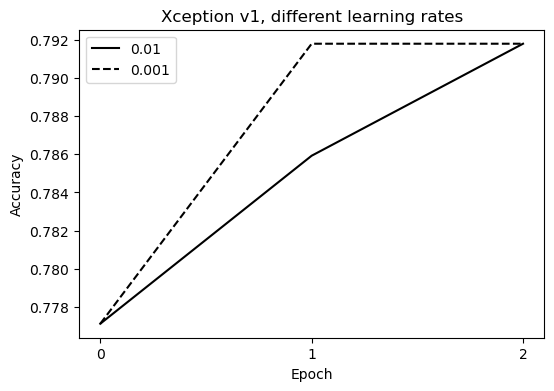

In [32]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, val_0_01, color='black', linestyle='solid', label='0.01')
plt.plot(epochs, val_0_001, color='black', linestyle='dashed', label='0.001')


plt.title('Xception v1, different learning rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()

plt.savefig('xception_v1_all_lr.svg')

plt.show()

In [33]:
model = make_model(learning_rate=0.001)

In [43]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max',
    )
]

history_0_001 = model.fit(train_ds, epochs=3, validation_data=val_ds, callbacks=callbacks)

Epoch 1/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.5123 - loss: 1.4908 - val_accuracy: 0.7859 - val_loss: 0.7174
Epoch 2/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.7812 - loss: 0.6544 - val_accuracy: 0.7830 - val_loss: 0.6412
Epoch 3/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.8206 - loss: 0.5157 - val_accuracy: 0.8182 - val_loss: 0.5680


In [44]:
# Let's add one more layer - and a dropout between them

In [45]:
def make_model(learning_rate, droprate):
    base_model = Xception(
        weights='imagenet',
        input_shape=(150, 150, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    
    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(100, activation='relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    
    return model

In [46]:
model = make_model(learning_rate=0.001, droprate=0.0)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v2_0_0_{epoch:02d}_{val_accuracy:.3f}.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_0 = model.fit(train_ds, epochs=3, validation_data=val_ds, callbacks=callbacks)

Epoch 1/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.5717 - loss: 1.3088 - val_accuracy: 0.7830 - val_loss: 0.6551
Epoch 2/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.8160 - loss: 0.5321 - val_accuracy: 0.8123 - val_loss: 0.5663
Epoch 3/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.8843 - loss: 0.3490 - val_accuracy: 0.7947 - val_loss: 0.5972


In [47]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v2_0_2_{epoch:02d}_{val_accuracy:.3f}.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_1 = model.fit(train_ds, epochs=3, validation_data=val_ds, callbacks=callbacks)

Epoch 1/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.5476 - loss: 1.3596 - val_accuracy: 0.7742 - val_loss: 0.7245
Epoch 2/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.7802 - loss: 0.6230 - val_accuracy: 0.8182 - val_loss: 0.5837
Epoch 3/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.8477 - loss: 0.4607 - val_accuracy: 0.8123 - val_loss: 0.5518


In [48]:
model = make_model(learning_rate=0.001, droprate=0.5)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v2_0_5_{epoch:02d}_{val_accuracy:.3f}.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_2 = model.fit(train_ds, epochs=3, validation_data=val_ds, callbacks=callbacks)

Epoch 1/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.4849 - loss: 1.5623 - val_accuracy: 0.7771 - val_loss: 0.7544
Epoch 2/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.7316 - loss: 0.8196 - val_accuracy: 0.7918 - val_loss: 0.6794
Epoch 3/3
96/96 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.7650 - loss: 0.6805 - val_accuracy: 0.8094 - val_loss: 0.5975


In [49]:
epochs = history_0.epoch

train00 = history_0.history['accuracy']
train02 = history_1.history['accuracy']
train05 = history_2.history['accuracy']

val00 = history_0.history['val_accuracy']
val02 = history_1.history['val_accuracy']
val05 = history_2.history['val_accuracy']

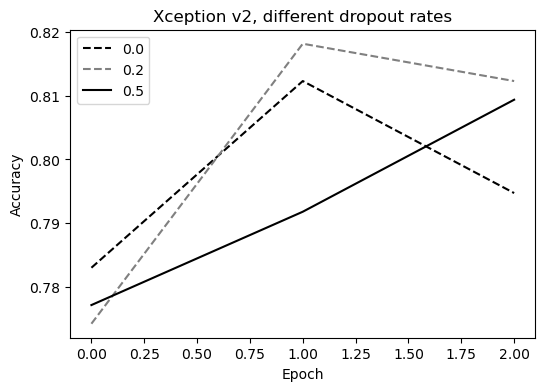

In [50]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, val00, color='black', linestyle='dashed', label='0.0')
plt.plot(epochs, val02, color='grey', linestyle='dashed', label='0.2')
plt.plot(epochs, val05, color='black', linestyle='solid', label='0.5')


plt.title('Xception v2, different dropout rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.legend()

plt.savefig('xception_v2_dropout.svg')

plt.show()

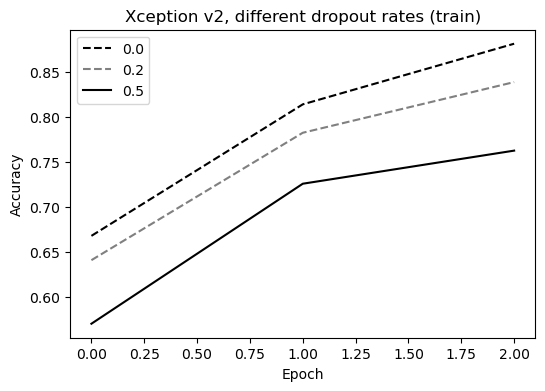

In [51]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, train00, color='black', linestyle='dashed', label='0.0')
plt.plot(epochs, train02, color='grey', linestyle='dashed', label='0.2')
plt.plot(epochs, train05, color='black', linestyle='solid', label='0.5')


plt.title('Xception v2, different dropout rates (train)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.legend()

plt.savefig('xception_v2_dropout_train.svg')

plt.show()